# 1. 선형회귀 - 당뇨병 수치 맞추기

## 도입부

첫 번째 프로젝트에서는 우리가 오늘 많은 시간을 들여서 직접 실습해 보았던 모델 설계, 손실함수 정의와 기울기 계산을 구현해 보겠습니다.
새로운 데이터로 프로젝트를 진행하지만, 과정은 모두 동일합니다. 함께 진행했던 과정과 코드를 참고하여 충분히 고민한 후 진행해 보세요.

데이터는 sklearn.datasets에 있는 데이터 중 하나인 당뇨병 데이터를 사용하겠습니다.
데이터에 관한 정보를 다음 글에서 살펴보세요. 데이터에 대한 이해는 언제나 첫 번째로 해야하는 필수 과정입니다!

    회귀 (3) - 당뇨병 환자 데이터(diabetes)와 다중 선형 회귀

다음 과정을 차례대로 진행해주세요!

## (1) 데이터 가져오기

    sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
    diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [157]:
from sklearn.datasets import load_diabetes

In [158]:
df_X = load_diabetes().data
df_y = load_diabetes().target
display(df_X.shape, df_y.shape)

(442, 10)

(442,)

(442개의 데이터, 10개의 피쳐를 가지고 있음.

In [159]:
load_diabetes().feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## (2) 모델에 입력할 데이터 X 준비하기

    df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [160]:
type(df_X) # 이미 numpy array형태로 되어 있다.

numpy.ndarray

## (3) 모델에 예측할 데이터 y 준비하기

    df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [161]:
type(df_y) # 이미 numpy array형태로 되어 있다.

numpy.ndarray

## (4) train 데이터와 test 데이터로 분리하기

    X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [162]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, random_state=42) # 다른 요구사항이 없어서 적용하지 않음

In [163]:
display(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(331, 10)

(111, 10)

(331,)

(111,)

## (5) 모델 준비하기

    입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
    모델 함수를 구현해주세요.

In [201]:
# 가중치 정의 및 초기화
import numpy as np

# 10개의 피쳐를 가지고 있다. 
W = np.random.rand(10)
b = np.random.rand()

In [202]:
# 모델 함수 구현
def model(X, W, b):
    pred = 0
    for i in range(10):
        pred += X[:, i] * W[i]
    pred += b
    return pred

## (6) 손실함수 loss 정의하기

    손실함수를 MSE 함수로 정의해주세요.

In [203]:
def MSE(a, b):
    return ((a - b) ** 2).mean() # 제곱 차이의 평균값

In [204]:
def loss(X, W, b, y):
    pred = model(X, W, b)
    _loss = MSE(pred, y)
    return _loss

## (7) 기울기를 구하는 gradient 함수 구현하기

    기울기를 계산하는 gradient 함수를 구현해주세요.

In [205]:
def gradient(X, W, b, y):
    # N : num of datapoint
    N = len(y)
    
    y_pred = model(X, W, b)
    
    # calculate gradient
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    dB = 2 * (y_pred - y).mean()
    
    return dW, dB

## (8) 하이퍼 파라미터인 학습률 설정하기

    학습률, learning rate 를 설정해주세요
    만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [206]:
lr_list = [1, 5e-1, 1e-1, 1e-2, 1e-3, 1e-4] # Setting Learning Rates

In [207]:
# 학습 결과를 기록하기 위해서 딕셔너리 사용

from collections import defaultdict
import matplotlib.pyplot as plt

losses_dict = defaultdict(list)


## (9) 모델 학습하기

    정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
    loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
    입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

--------------------------------
learning_rate : 1, Training
Iteration 100 : Loss 27328.7752
Iteration 200 : Loss 27203.5032
Iteration 300 : Loss 27313.3974
Iteration 400 : Loss 27495.2225
Iteration 500 : Loss 27705.5968
Iteration 600 : Loss 27928.8588
Iteration 700 : Loss 28158.9150
Iteration 800 : Loss 28393.2671
Iteration 900 : Loss 28630.8416
Iteration 1000 : Loss 28871.1589


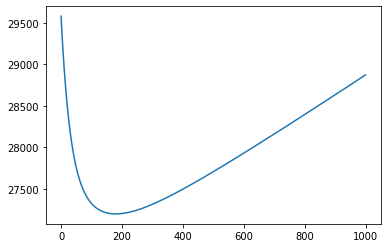

Final Loss : 28871.15892692536
--------------------------------
learning_rate : 0.5, Training
Iteration 100 : Loss 4041.7914
Iteration 200 : Loss 3485.8898
Iteration 300 : Loss 3257.2235
Iteration 400 : Loss 3135.9312
Iteration 500 : Loss 3064.1411
Iteration 600 : Loss 3019.7234
Iteration 700 : Loss 2991.5869
Iteration 800 : Loss 2973.4442
Iteration 900 : Loss 2961.5525
Iteration 1000 : Loss 2953.6310


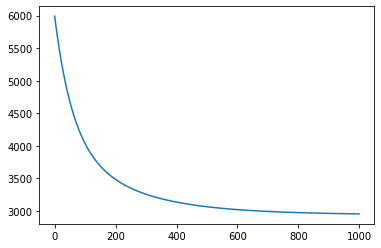

Final Loss : 2953.6309802693895
--------------------------------
learning_rate : 0.1, Training
Iteration 100 : Loss 5373.2129
Iteration 200 : Loss 4889.6123
Iteration 300 : Loss 4528.1739
Iteration 400 : Loss 4254.4392
Iteration 500 : Loss 4044.0838
Iteration 600 : Loss 3879.8922
Iteration 700 : Loss 3749.6405
Iteration 800 : Loss 3644.6140
Iteration 900 : Loss 3558.5687
Iteration 1000 : Loss 3487.0037


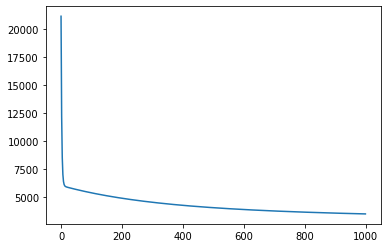

Final Loss : 3487.00369806887
--------------------------------
learning_rate : 0.01, Training
Iteration 100 : Loss 6368.4254
Iteration 200 : Loss 5887.6965
Iteration 300 : Loss 5810.1389
Iteration 400 : Loss 5741.7793
Iteration 500 : Loss 5675.6183
Iteration 600 : Loss 5611.4648
Iteration 700 : Loss 5549.2493
Iteration 800 : Loss 5488.9070
Iteration 900 : Loss 5430.3753
Iteration 1000 : Loss 5373.5939


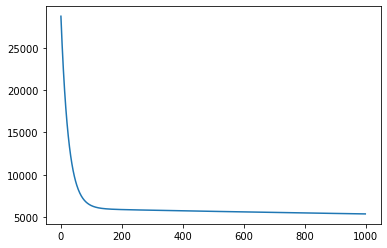

Final Loss : 5373.593895269364
--------------------------------
learning_rate : 0.001, Training
Iteration 100 : Loss 21848.5022
Iteration 200 : Loss 16618.3408
Iteration 300 : Loss 13111.4208
Iteration 400 : Loss 10759.1585
Iteration 500 : Loss 9180.5769
Iteration 600 : Loss 8120.4041
Iteration 700 : Loss 7407.5962
Iteration 800 : Loss 6927.5464
Iteration 900 : Loss 6603.4624
Iteration 1000 : Loss 6383.8903


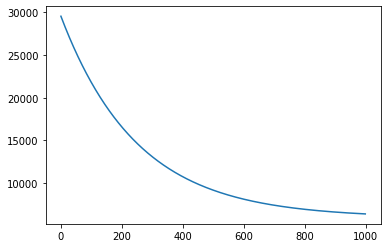

Final Loss : 6383.890301919804
--------------------------------
learning_rate : 0.0001, Training
Iteration 100 : Loss 28723.3528
Iteration 200 : Loss 27832.5533
Iteration 300 : Loss 26976.6572
Iteration 400 : Loss 26154.2957
Iteration 500 : Loss 25364.1539
Iteration 600 : Loss 24604.9681
Iteration 700 : Loss 23875.5245
Iteration 800 : Loss 23174.6567
Iteration 900 : Loss 22501.2441
Iteration 1000 : Loss 21854.2101


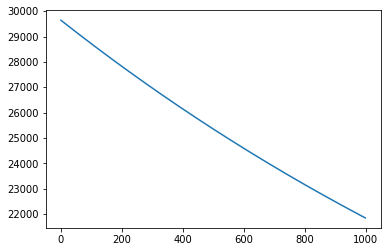

Final Loss : 21854.21010237041


In [218]:
for lr in lr_list: 
    print("--------------------------------")
    print(f"learning_rate : {lr}, Training")
    _W = np.copy(W)
    _b = np.copy(b)
    losses = []
    
    for i in range(1, 1001):
        dW, dB = gradient(train_X, _W, _b, train_y)
        _W -= lr * dW
        _b -= lr * dB
        L = loss(train_X, _W, _b, train_y)

        # Record loss
        losses.append(L)

        # logging per 100 epochs
        if i % 100 == 0:
            print("Iteration %d : Loss %0.4f" % (i,L))
    
    plt.plot(losses)
    plt.show()
    
    losses_dict[lr] = {'W':_W, 'b':_b, 'Final_loss': L}
    print("Final Loss :", L)

### 학습 결과 학습률-손실함수 값 분석
lr = 0.5에서 MSE손실함수 값 2953을 달성할 수 있었음 <=3000  
lr 0.1 ~ 0.001의 범위 내에서는 3000에 비교적 근접하는 값을 도출 할 수 있었지만,  
루브릭의 조건에 따라 lr = 0.5 선택

## (10) test 데이터에 대한 성능 확인하기

    test 데이터에 대한 성능을 확인해주세요.

In [227]:
# lr = 0.5에 대한 학습된 가중치를 불러옴

sel_weights = losses_dict[0.5]
W, b = sel_weights['W'], sel_weights['b']


가중치 값 확인

In [228]:
W, b

(array([  53.72290081, -196.56436106,  502.54002016,  342.20265182,
         -84.61979868, -116.21339297, -237.11271891,  148.6832392 ,
         357.1578602 ,   95.27059236]),
 array(151.58711))

테스트 데이터를 통한 MSE 값 계산

In [230]:
y_pred = model(test_X, W, b)
mse = loss(test_X, W, b, test_y)
mse # validation mse 또한 3000 이하의 값을 확인할 수 있었다. 

2811.001610251728

## (11) 정답 데이터와 예측한 데이터 시각화하기

    x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

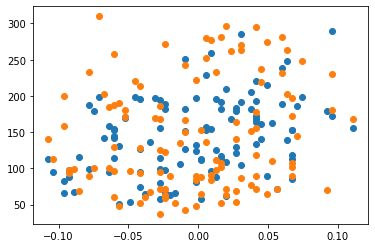

In [234]:
plt.scatter(test_X[:,0], y_pred, cmap='r')
plt.scatter(test_X[:,0], test_y, cmap='b')
plt.show()

# 2. 자전거 타는 사람 몇명 ?

## 도입부
자.. 드디어 오늘의 마지막 프로젝트입니다! 오늘 노드의 제목이기도 한 프로젝트네요 ㅎㅎ
마지막 프로젝트로는 보다 실용적인 데이터셋을 활용할 예정입니다. 바로 그 유명한 캐글(Kaggle) 경진대회에서 제공하는 데이터셋인데요!

데이터셋의 주제는 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측하는 문제입니다.
자전거 대여량을 결정하는 데에는 시간도 중요할 것이고, 요일이나 계절도 크게 영향을 미칠 것 같습니다.

이번 프로젝트에서는 직접 손실함수와 기울기를 계산하지 않고, 사이킷런(sklearn)의 LinearRegression 모델을 활용할 것입니다.
이 또한 위에서 진행해봤던 순서 그대로 진행하시면 됩니다!

단계는 다음과 같이 정리가 되어 있습니다. 그러면 오늘의 마지막 프로젝트, 시작해 볼까요!!! 💪🏼

## (1) 데이터 가져오기

    터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
    여기에서 데이터를 상세히 확인할 수 있습니다.

In [1]:
import pandas as pd

# df = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")
train = pd.read_csv('./train.csv') # Local Directory
train.head() # 초기 5개의 값 확인

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
train.shape

(10886, 12)

## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

    to_datetime 활용 : 링크 참조
    pandas datetime extract year month day 키워드로 검색해 보기

In [3]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html 참조

# datetime64 자료형으로 추출
_datetime = pd.to_datetime(train['datetime'])
_datetime

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [4]:
# 6가지의 컬럼 생성하기
train['year'] = _datetime.dt.year
train['month'] = _datetime.dt.month
train['day'] = _datetime.dt.day
train['hour'] = _datetime.dt.hour
train['minute'] = _datetime.dt.minute
train['second'] = _datetime.dt.second

train.head() # 추가가 된 것을 확인

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

    sns.countplot 활용해서 시각화하기
    subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

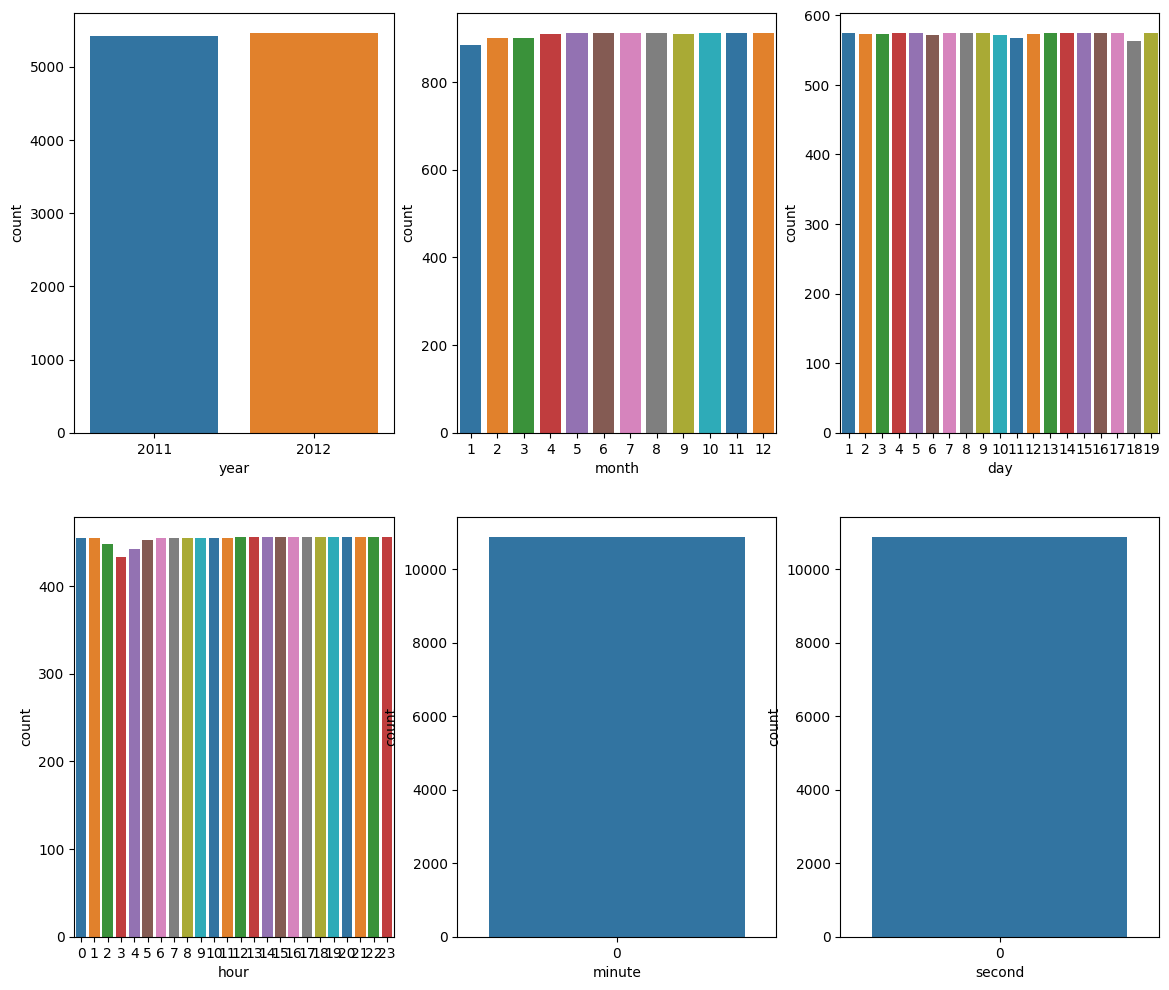

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14, 12))
col_names = ['year', 'month', 'day', 'hour', 'minute', 'second']

# 6개 - 2행 3열의 subplot으로 시각화를 진행
for idx, col_name in enumerate(col_names, start=1) : 
    ax = plt.subplot(2, 3, idx)
    sns.countplot(train, x =col_name, hue=col_name, ax=ax, palette='tab10', legend=False)
plt.show()

### 결과 해석
- **year** : 2011, 2012 단 두개의 범주로, 거의 균등한 분포를 보인다.
- **month** : 1, 2, 3월에 다소 감소된 양을 보임
    - 왠지, 겨울이라서 그런 것 같음..
- **day** : 1 ~ 19 사이의 수로, 균등한 분포를 보이나, 10, 11, 18이 다소 적다.
- **hour** : 하루 24시간에 대한 분포로, 0 ~ 6사이에 줄어들었다가 늘어나는 추세를 보임
    - 심야 ~ 새벽시간에는 잠을 자기 때문이 아닐까..
- **minute, second** : 전 값이 0으로, 모델 학습에 불필요 하다고 판단된다.
    - 제거 예정

### Data column Description (https://www.kaggle.com/c/bike-sharing-demand/data) and EDA

- datetime - hourly date + timestamp
> 위에서 전처리 되었음, month, day, hour 세가지를 사용 (year의 경우 균등해서, minute, second는 값이 전부 0으로 무의미)

- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter


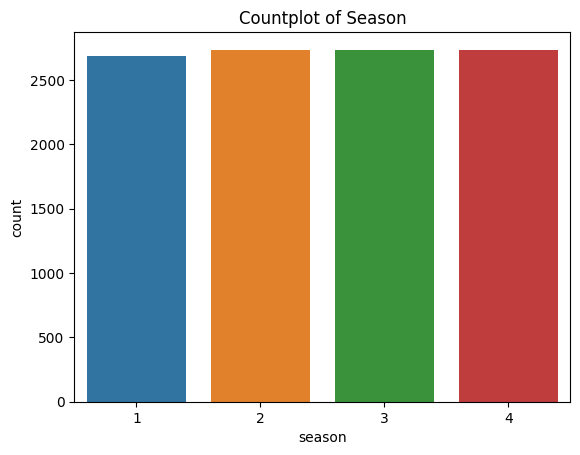

In [9]:
sns.countplot(train, x ='season', hue='season', palette='tab10', legend=False)
plt.title("Countplot of Season")
plt.show()

> 봄에 다소 적은 경향을 보임, datetime에서 처리한 month값과 다중공선성이 있을 것으로 예상. 사용하지 않음

- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday


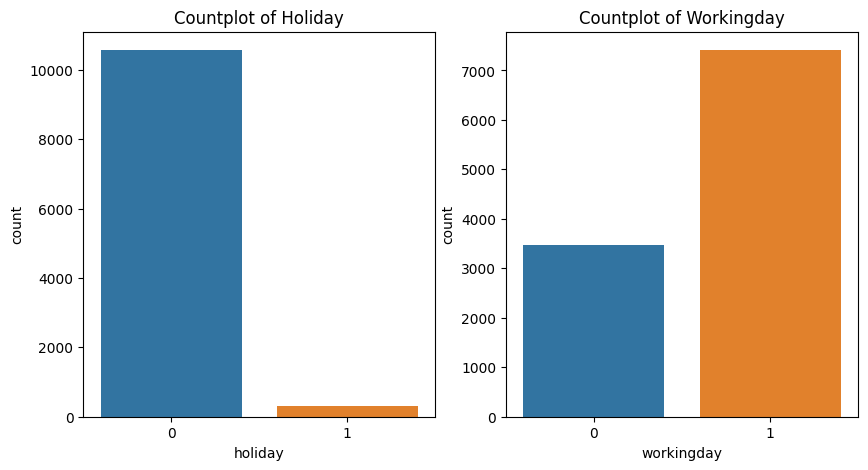

In [12]:
fig = plt.figure(figsize=(10, 5))

ax1 = plt.subplot(1, 2, 1)
sns.countplot(train, x ='holiday', hue='holiday', ax=ax1, palette='tab10', legend=False)
plt.title("Countplot of Holiday")
ax2 = plt.subplot(1, 2, 2)
sns.countplot(train, x ='workingday', hue='workingday', ax=ax2, palette='tab10', legend=False)
plt.title("Countplot of Workingday")
plt.show()

### 의견
위 데이터 설명에 기인하면, holiday도 아니면서 weekend가 아닌 경우 workingday라고 함. toggle관계가 아니기 때문에 일단 사용


- weather
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 


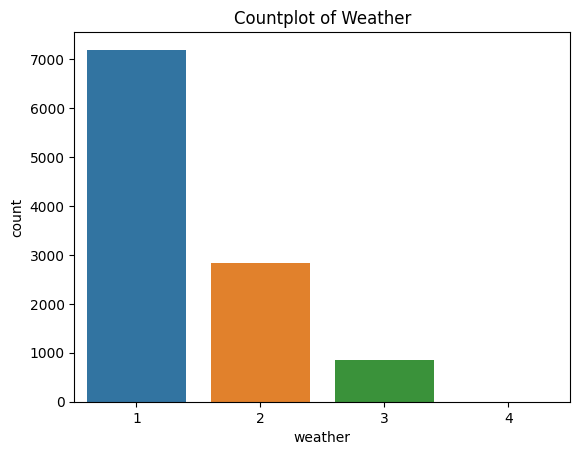

In [13]:
sns.countplot(train, x ='weather', hue='weather', palette='tab10', legend=False)
plt.title("Countplot of Weather")
plt.show()

- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius


/tmp/ipykernel_54966/3131484447.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


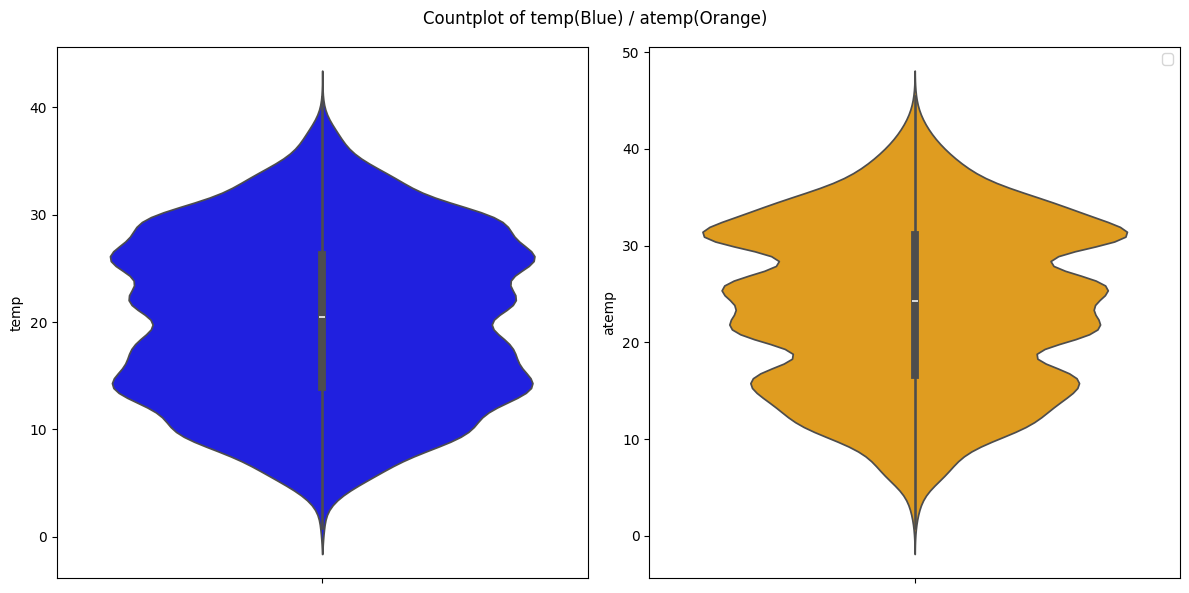

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(train, y='temp', ax=axes[0], color='blue')
sns.violinplot(train, y='atemp', ax=axes[1], color='orange')
plt.legend()
fig.suptitle("Countplot of temp(Blue) / atemp(Orange)")
plt.tight_layout()
plt.show()

### 의견
> 분포 자체는 이상치가 보이지는 않아보임. 사용하도록 하겠음
- 체감온도와 온도가, 자전거 대여에 영향을 줄 수 있다고 생각


- humidity - relative humidity
- windspeed - wind speed


/tmp/ipykernel_54966/2299596182.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


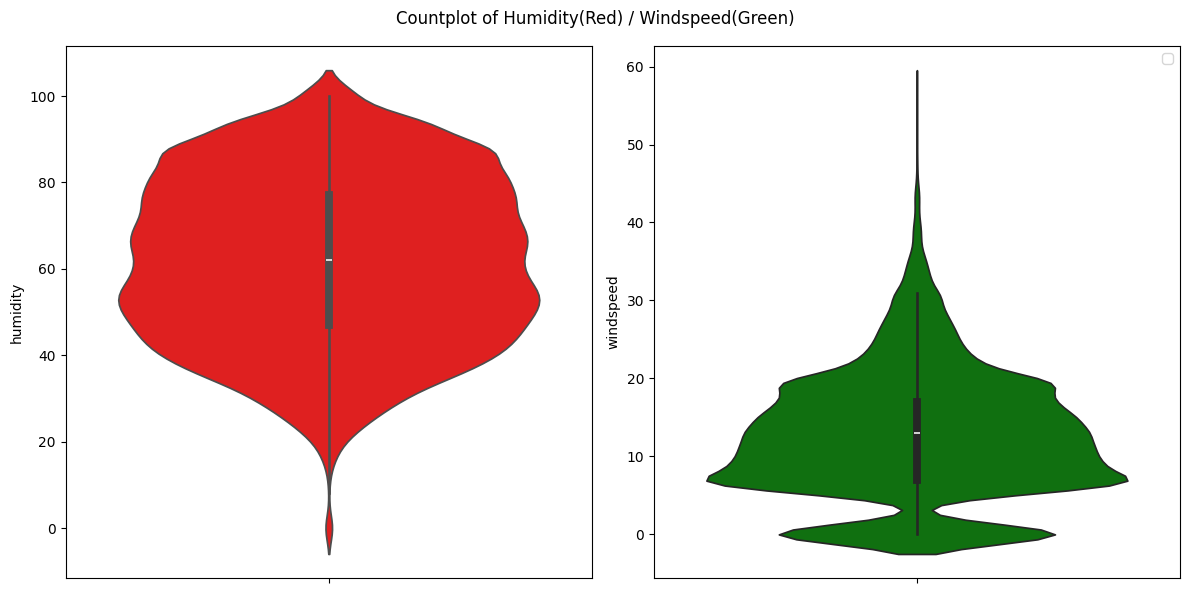

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.violinplot(train, y='humidity', ax=axes[0], color='red')
sns.violinplot(train, y='windspeed', ax=axes[1], color='green')
plt.legend()
fig.suptitle("Countplot of Humidity(Red) / Windspeed(Green)")
plt.tight_layout()
plt.show()

### 의견
- 습도의 경우에도 온도와 마찬가지로 이상치가 없어보임.
- 풍속의 경우에는, 모양이 특이한데, 상식적으로 생각해보면 풍속이 0일 경우도 있기 때문에 따로 처리없이 사용


- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals
> 해결하려는 것은 대여 수 예측임. 미등록/등록 사용자의 대여 여부는 중요하지 않기 떄문에 사용하지 않음

## (4) X, y 컬럼 선택 및 train/test 데이터 분리

    X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다  
    데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 
    
    만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다.  
    ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

    count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

In [39]:
# 변수 할당 - 
X = train[['month', 'day', 'hour',
          'holiday', 'workingday',
          'weather',
          'temp', 'atemp',
          'humidity', 'windspeed']
           ]
y = train['count']

In [41]:
# 데이터 분리
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, shuffle=False, # 시계열성이 있어서, 섞지 않음
                                                    random_state=42, test_size=0.2) # 재현성을 위한 랜덤시드 고정

train_X.shape, test_X.shape, train_y.shape, test_y.shape

((8708, 10), (2178, 10), (8708,), (2178,))

## (5) LinearRegression 모델 학습

    sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [43]:
# 모델 클래스 임포트 및 인스턴스 생성
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [44]:
# 모델 훈련
lr_model.fit(train_X, train_y)

LinearRegression()

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

    학습된 모델에 X_test를 입력해서 예측값 출력하기
    모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
    mse 값과 함께 rmse 값도 계산하기

In [48]:
pred_y = lr_model.predict(test_X)

In [49]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

mse = mean_squared_error(pred_y, test_y)
rmse = root_mean_squared_error(pred_y, test_y)
print(f"MSE : {mse}, RMSE :{rmse}")

MSE : 40840.27073858038, RMSE :202.0897591135691


### 의견 
> MSE값은 오차의 제곱에 비례하기 때문에, 40000이 넘는 다소 큰 값을 보임. 반면에 RMSE의 경우 200 정도의 값을 보임

## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

    x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기


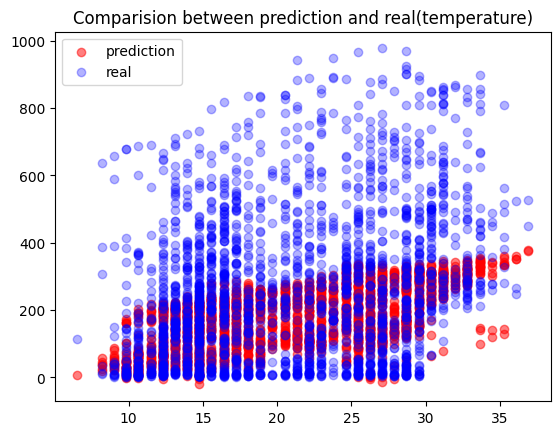

In [78]:
plt.scatter(test_X['temp'], pred_y, color='r', alpha=0.5)
plt.scatter(test_X['temp'], test_y, color='b', alpha=0.3)
plt.title("Comparision between prediction and real(temperature)")
plt.legend(['prediction', 'real'])
plt.show()

    x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

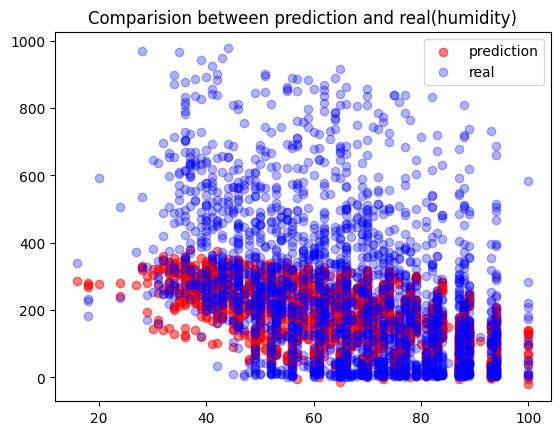

In [77]:
plt.scatter(test_X['humidity'], pred_y, color='r', alpha=0.5)
plt.scatter(test_X['humidity'], test_y, color='b', alpha=0.3)
plt.title("Comparision between prediction and real(humidity)")
plt.legend(['prediction', 'real'])
plt.show()

### 의견
- 두 시각화자료를 보면, 예측값이 실제 값들에 비해서 분포가 조밀한 것을 볼 수 있음.
- 다른 특성데이터들을 포함해서, 모델의 표현력을 좀 더 강화시켜야 될 것 같다는 생각이 든다.
- Tree기반의 모델들도 비슷하게 나올지가 궁금하다.

## Decision Tree로 예측

In [80]:
from sklearn.tree import DecisionTreeRegressor

dt_r = DecisionTreeRegressor()

dt_r.fit(train_X, train_y)

DecisionTreeRegressor()

In [81]:
pred_y = dt_r.predict(test_X)

mse = mean_squared_error(pred_y, test_y)
rmse = root_mean_squared_error(pred_y, test_y)
print(f"MSE : {mse}, RMSE :{rmse}")

MSE : 19627.04453627181, RMSE :140.09655433404424


### 의견 : 
Linear Regression보다 약간 감소된 RMSE, RMSE 값들을 확인

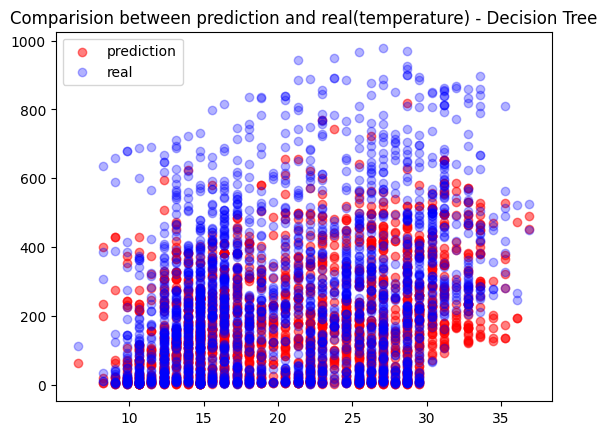

In [82]:
# Plot scatter of Decision Tree, with temperature at X axis
plt.scatter(test_X['temp'], pred_y, color='r', alpha=0.5)
plt.scatter(test_X['temp'], test_y, color='b', alpha=0.3)
plt.title("Comparision between prediction and real(temperature) - Decision Tree")
plt.legend(['prediction', 'real'])
plt.show()

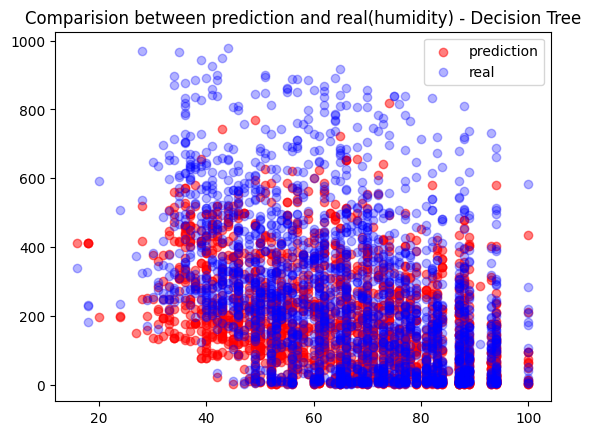

In [83]:
# Plot scatter of Decision Tree, with humidity at X axis
plt.scatter(test_X['humidity'], pred_y, color='r', alpha=0.5)
plt.scatter(test_X['humidity'], test_y, color='b', alpha=0.3)
plt.title("Comparision between prediction and real(humidity) - Decision Tree")
plt.legend(['prediction', 'real'])
plt.show()

### 의견
- 특성을 추가하지 않고, 모델만 변경했을 뿐인데, 다소 Linear Regression모델에 비해 데이터의 오버랩이 많아진 것을 확인할 수 있었다.
- 루브릭의 조건값인 150 이하도 달성

## 표준화 적용 후 예측

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [89]:
train_X, test_X, train_y, test_y = train_test_split(scaled_X, y, shuffle=False, # 시계열성이 있어서, 섞지 않음
                                                    random_state=42, test_size=0.2) # 재현성을 위한 랜덤시드 고정

lr_model = LinearRegression()
lr_model.fit(train_X, train_y)

pred_y = lr_model.predict(test_X)

mse = mean_squared_error(pred_y, test_y)
rmse = root_mean_squared_error(pred_y, test_y)
print(f"MSE : {mse}, RMSE :{rmse}")

MSE : 40840.27073858029, RMSE :202.08975911356887


### 의견
> 표준화는 선형회귀모델의 예측 향상에 그다지 효과적이지 못한 것으로 보인다.

In [98]:
train.iloc[:, 1:].corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546,NaN,NaN
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354,NaN,NaN
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780,NaN,NaN
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,NaN,NaN
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430,NaN,NaN
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343,NaN,NaN
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,NaN,NaN
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631,NaN,NaN
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,NaN,NaN
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540,NaN,NaN


### 의견
- temp, atemp는 역시 0.98로 매우 강한 상관관계
- month, season또한 0.97로 매우 강한 상관관계
- registered, count 도 0.97 매우 강한 상관관계
- casual, count 도 0.69 강한 상관관계
> 위 상관계수 분석에 근거하여 다중공선성 제거를 위한 추가적인 특성 선택/제거 진행

In [120]:
# 변수 할당 - 
X = train[['year', 'month', 'day', 'hour', # year 추가
          'holiday', 'workingday',
          'weather',
          'atemp', # temp, atemp 중 atemp 선택
          'humidity', 'windspeed']
           ]
y = train['count']

In [121]:
train_X, test_X, train_y, test_y = train_test_split(X, y, # 시계열성이 있다고 생각했는데, 이미 각 데이터포인트에 시간정보가 있어서, 시간패턴의 입력 불필요 판단 - 셔플 제거
                                                    random_state=42, test_size=0.2) # 재현성을 위한 랜덤시드 고정

lr_model = LinearRegression()
lr_model.fit(train_X, train_y)

pred_y = lr_model.predict(test_X)

mse = mean_squared_error(pred_y, test_y)
rmse = root_mean_squared_error(pred_y, test_y)
print(f"MSE : {mse}, RMSE :{rmse}")

MSE : 19959.061030591547, RMSE :141.27654097758605


### 의견
- 루브릭 목표인 141.27 <= 150 을 달성할 수 있었음.
- 개별 포인트이면서, 과거의 트렌드로 미래를 예측하는 테스크가 아니었다.

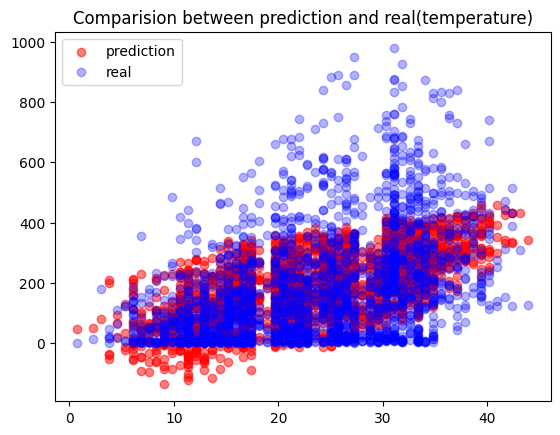

In [123]:
plt.scatter(test_X['atemp'], pred_y, color='r', alpha=0.5)
plt.scatter(test_X['atemp'], test_y, color='b', alpha=0.3)
plt.title("Comparision between prediction and real(temperature)")
plt.legend(['prediction', 'real'])
plt.show()

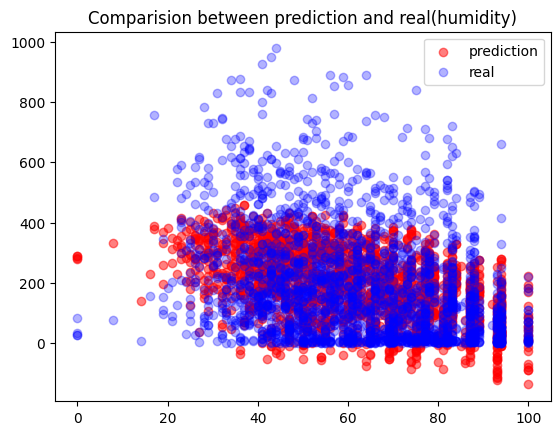

In [124]:
plt.scatter(test_X['humidity'], pred_y, color='r', alpha=0.5)
plt.scatter(test_X['humidity'], test_y, color='b', alpha=0.3)
plt.title("Comparision between prediction and real(humidity)")
plt.legend(['prediction', 'real'])
plt.show()